Saving Screenshot 2024-12-23 151455.png to Screenshot 2024-12-23 151455.png


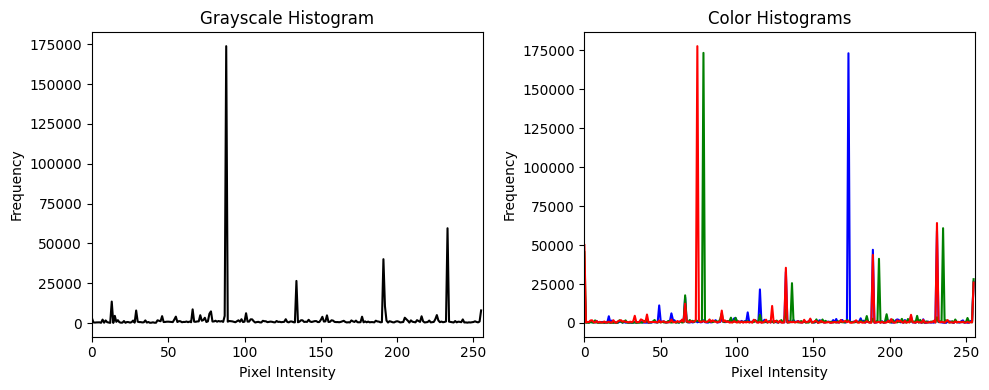

Brightness: 127.7816841682744
Contrast: 173679.0
Gray Histogram Peak: 88


In [11]:
# Install necessary libraries if not already installed
!pip install opencv-python matplotlib numpy

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image from your local machine
uploaded = files.upload()

# The filename of the uploaded image will be available after upload
image_path = list(uploaded.keys())[0]  # Grabs the first (and only) file

# Function to load and process image
def analyze_image_histogram(image_path):
    # Load the image in color (BGR)
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    # Convert to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to Grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute grayscale histogram
    gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Plot Grayscale Histogram
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.plot(gray_hist, color='black')
    plt.xlim([0, 256])

    # Compute and plot RGB histograms
    colors = ('b', 'g', 'r')
    plt.subplot(1, 2, 2)
    plt.title("Color Histograms")
    for i, col in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # Analysis: Brightness and Contrast
    gray_range = gray_hist.max() - gray_hist.min()
    brightness = np.mean(gray_image)
    contrast = gray_range

    return {
        "brightness": brightness,
        "contrast": contrast,
        "gray_histogram_peak": np.argmax(gray_hist),
    }

# Run the analysis on the uploaded image
result = analyze_image_histogram(image_path)

# Print the analysis results
print("Brightness:", result["brightness"])
print("Contrast:", result["contrast"])
print("Gray Histogram Peak:", result["gray_histogram_peak"])